In [3]:
import pandas as pd
import json
from matplotlib import pyplot as plt


In [9]:
df = pd.read_csv(r'C:\Users\nivy1\Documents\Engineering\MS.c\Natural Language Processing\ner-food-recipies\data\TASTEset.csv')
df.head(5)

,ingredients,ingredients_entities
0,5 ounces rum\r\n4 ounces triple sec\r\n3 ounce...,"[{""start"": 0, ""end"": 1, ""type"": ""QUANTITY"", ""e..."
1,"2 tubes cinnamon roll, refrigerated, with icin...","[{""start"": 0, ""end"": 1, ""type"": ""QUANTITY"", ""e..."
2,4 ripe coconuts\r\n1 cup evaporated milk\r\n1 ...,"[{""start"": 0, ""end"": 1, ""type"": ""QUANTITY"", ""e..."
3,1 sheet graham cracker (broken in half)\r\n2 p...,"[{""start"": 0, ""end"": 1, ""type"": ""QUANTITY"", ""e..."
4,1 (8 ounce) package crescent rolls\r\n8 slices...,"[{""start"": 0, ""end"": 1, ""type"": ""QUANTITY"", ""e..."


In [10]:
count_ingredients = []
for i in range (0, len(df.index)):
    count_ingredients.append(len(df.ingredients.iloc[i].split('\n'))-1)

Text(0.5, 1.0, 'The number of ingredients in the recipe')

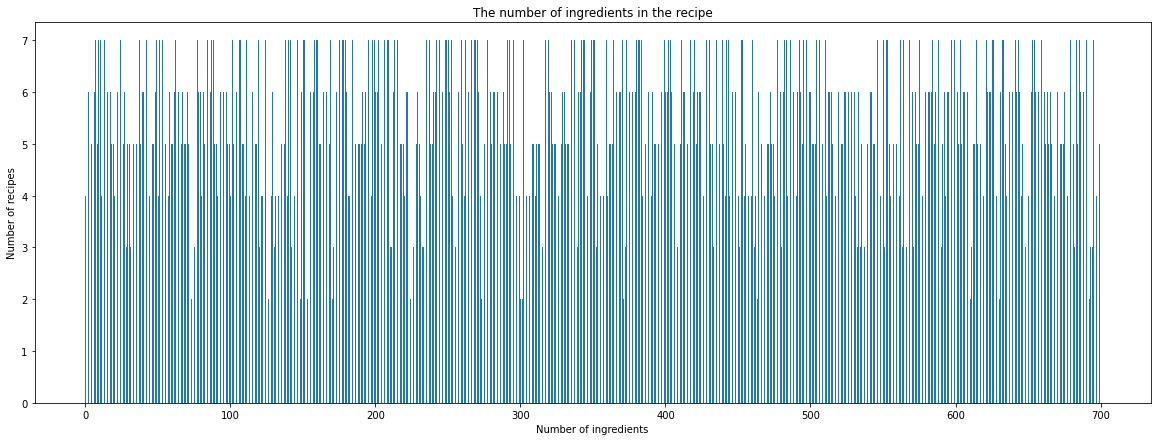

In [13]:
count_ingredients = []
number_recipe = []
for i in range (0, len(df.index)):
    count_ingredients.append(len(df.ingredients.iloc[i].split('\n'))-1)
    number_recipe.append(i+1)

df_count_ingredients1=pd.DataFrame({"number_recipe":number_recipe ,"count_ingredients":count_ingredients})
df_count_ingredients1

plt.figure(figsize=(20, 7))
plt.rcParams["figure.figsize"] = [15, 10]
plt.bar(range(len(df_count_ingredients1['number_recipe'])), df_count_ingredients1['count_ingredients'], align='edge', width=0.5)



plt.ylabel('Number of recipes')
plt.xlabel('Number of ingredients')
plt.title('The number of ingredients in the recipe')



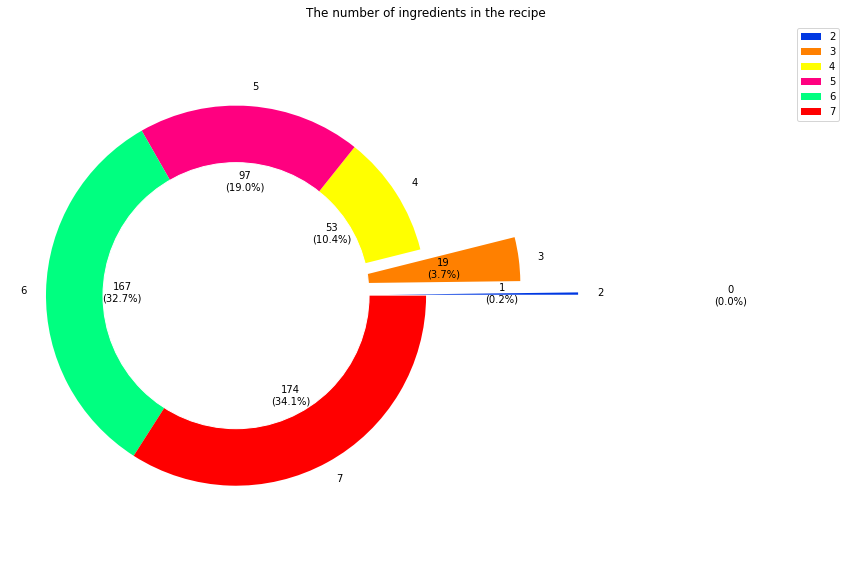

In [14]:
number_recipes = []
counter_of_ingredients = []

largest_number = 1
for number in count_ingredients:
    if number > largest_number:
        largest_number = number

for n in range(largest_number):
    number_recipes.append(0)
    counter_of_ingredients.append(n+1)

for i in count_ingredients:
    for j in range(0, len(counter_of_ingredients)):
        if(i == j):
            number_recipes[i] = number_recipes[i]+1
            
               
# df_counter_of_ingredients=pd.DataFrame({"number_recipes":number_recipes ,"count_ingredients":counter_of_ingredients})
# df_counter_of_ingredients

# plt.figure(figsize=(10, 5))
# plt.bar(df_counter_of_ingredients['count_ingredients'], df_counter_of_ingredients['number_recipes'], align='center', width=0.3)


# plt.ylabel('Number of recipes')
# plt.xlabel('Number of ingredients')
# plt.title('The number of ingredients in the recipe')

# labels = counter_of_ingredients
# values = [4500, 2500, 1053, 500]

def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{v:d}\n({:.1f}%)'.format(pct, v=val)
        return my_format

counts = pd.Series(number_recipes, 
                   index= counter_of_ingredients)

explode = (2,0.8, 0.5, 0, 0, 0, 0)
colors = ['#FF007F','#0038E2','#FF8000', '#FFFF00', '#FF0080', '#00FF80', '#FF0000']

my_circle = plt.Circle((0, 0), 0.7, color='white')

counts.plot(kind='pie', fontsize=10, colors=colors, explode=explode, autopct=autopct_format(number_recipes))
plt.axis('equal')
plt.ylabel('')
plt.title('The number of ingredients in the recipe')
plt.legend(loc="best")
plt.gca().add_artist(my_circle)
plt.show()




In [15]:
# df.ingredients_entities.iloc[0]
types = []
number_of_types = []

for i in range (0, len(df.index)):
    python_dict = json.loads(df.ingredients_entities.iloc[i])
    for item in python_dict:
        if item['type'] not in types:
            number_of_types.append(0)
            types.append(item['type'])
print(types)
    
for i in range (0, len(df.index)):
    python_dict = json.loads(df.ingredients_entities.iloc[i])
    for item in python_dict:
        number_of_types[types.index(item['type'])] = number_of_types[types.index(item['type'])] + 1

number_of_types

['QUANTITY', 'UNIT', 'FOOD', 'PROCESS', 'PHYSICAL_QUALITY', 'PART', 'PURPOSE', 'TASTE', 'COLOR']


[3780, 3172, 4020, 1091, 793, 55, 94, 126, 231]

{'QUANTITY': 3780, 'UNIT': 3172, 'FOOD': 4020, 'PROCESS': 1091, 'PHYSICAL_QUALITY': 793, 'PART': 55, 'PURPOSE': 94, 'TASTE': 126, 'COLOR': 231}


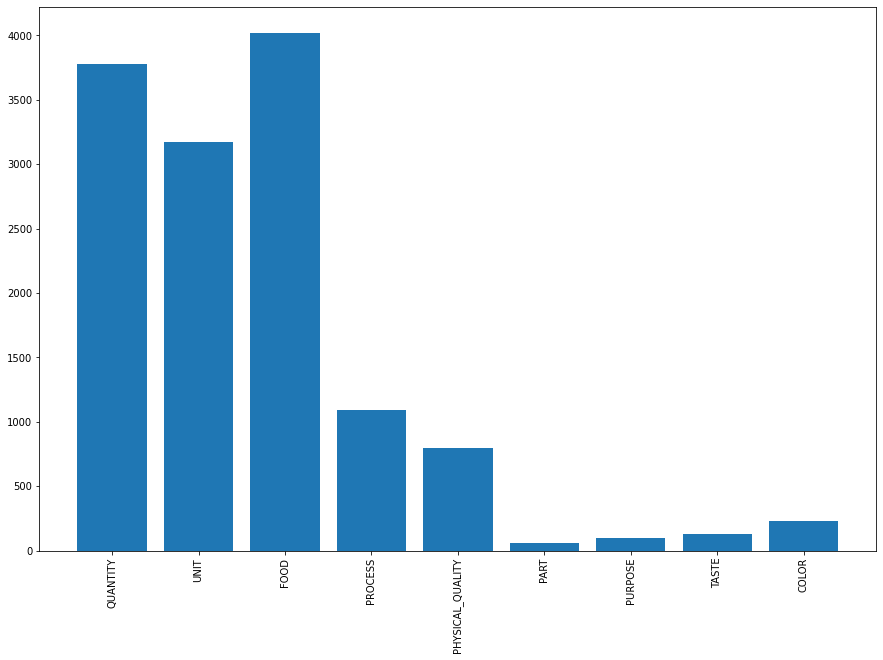

In [16]:
# df.ingredients_entities.iloc[0]
types = []
number_of_types = []
dic = {}

for i in range (0, len(df.index)):
    python_dict = json.loads(df.ingredients_entities.iloc[i])
    for item in python_dict:
        if item['type'] not in dic:
            dic[item['type']] = 0
        dic[item['type']] = dic[item['type']] + 1

print(dic)

plt.bar(range(len(dic)), list(dic.values()), align='center')
plt.xticks(range(len(dic)), list(dic.keys()))
plt.xticks(rotation = 90)
plt.show()





In [17]:
# df.ingredients_entities.iloc[0]
dic1 = {}

for i in range (0, len(df.index)):
    python_dict = json.loads(df.ingredients_entities.iloc[i])
    for item in python_dict:
        if 'FOOD' in item['type']: 
            if item['entity'] not in dic1:
                dic1[item['entity']] = 0
            dic1[item['entity']] = dic1[item['entity']] + 1

print("Total number of ingredients in the dataset: ", len(dic1))

sorted_x = sorted(dic1.items(), key=lambda kv: kv[1])
sorted_x.reverse()
sorted_x
sorted_x_head=sorted_x[:40]


Total number of ingredients in the dataset:  1123


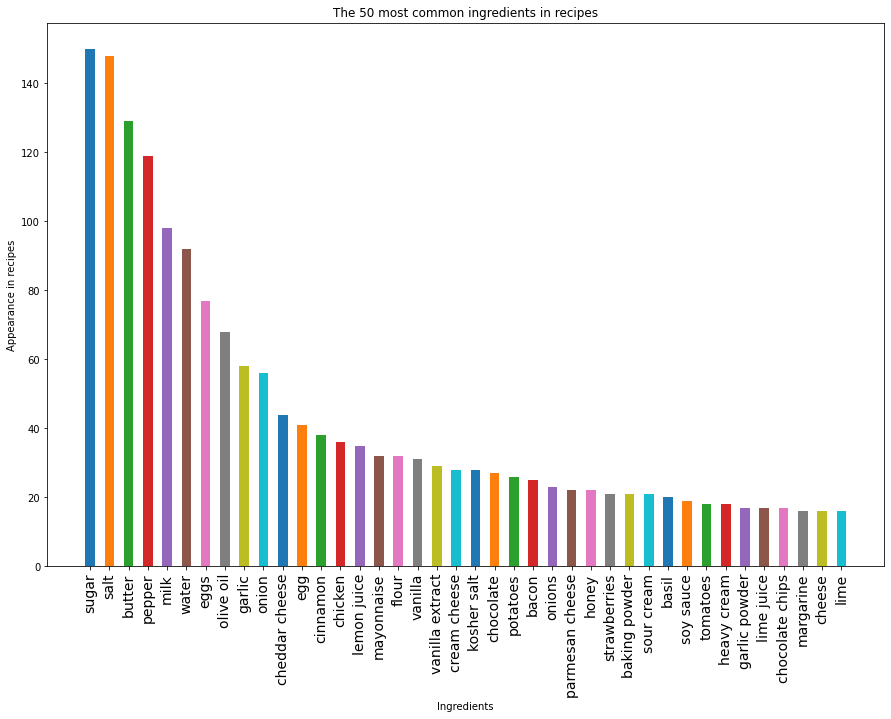

In [18]:
for z in range(len(sorted_x_head)):
    plt.bar(sorted_x_head[z][0], sorted_x_head[z][1], align='center', width=0.5)
    plt.xticks(rotation = 90)
    plt.rcParams["figure.figsize"] = [15, 10]
    plt.tick_params(axis='x', which='major', labelsize=14)
plt.ylabel('Appearance in recipes')
plt.xlabel('Ingredients')
plt.title('The 50 most common ingredients in recipes')
plt.show()


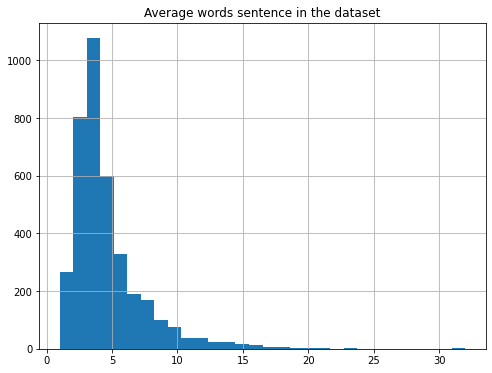

In [19]:

words_in_sentence = []
sentences = []
sentence = 0
for i in range (0, len(df.index)):
    for j in range (0, len(df.ingredients.iloc[i].split('\n'))-1):
        string = df.ingredients.iloc[i].split('\n')[j]
        sentence = sentence + 1
        for k in range (0, len(string.split(' '))):
            sentences.append(sentence)
            words_in_sentence.append(1)

df_data = pd.DataFrame({"Sentence #":sentences, "Word":words_in_sentence})

word_counts = df_data.groupby("Sentence #")["Word"].agg(["count"])
word_counts = word_counts.rename(columns={"count": "Average words sentence in the dataset"})
word_counts.hist(bins=30, figsize=(8,6));


In [20]:
MAX_SENTENCE = word_counts.max()[0]
print("Longest sentence in the corpus contains {} words.".format(MAX_SENTENCE))
print("Total number of sentences in the dataset: {:,}".format(df_data["Sentence #"].nunique()))
print("Total words in the dataset: {:,}".format(df_data.shape[0]))

Longest sentence in the corpus contains 32 words.
Total number of sentences in the dataset: 3,788
Total words in the dataset: 19,020
